In [17]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
from sklearn.metrics import roc_curve
from scipy import interpolate

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
from tensorflow.python.client import device_lib
physical_gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_gpus[0], True)

2024-07-08 10:56:17.880889: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2024-07-08 10:56:17.919928: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: NVIDIA TITAN Xp major: 6 minor: 1 memoryClockRate(GHz): 1.582
pciBusID: 0000:3b:00.0
2024-07-08 10:56:17.920167: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2024-07-08 10:56:17.921903: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2024-07-08 10:56:17.923154: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10.0
2024-07-08 10:56:17.923436: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10.0
2024-07-08 10:56:17.924995: I tensorflow/stream_executor/platform/d

In [19]:
os.chdir(r'/home/manhducnmd/pp_dijet/Results_full')

In [20]:
bkg_sr_jet_1 = np.load('background_images_sr_25_jet_1.npy')
bkg_sr_jet_2 = np.load('background_images_sr_25_jet_2.npy')

signal_sr_jet_1 = np.load('id10_sr_25_jet_1.npy')
signal_sr_jet_2 = np.load('id10_sr_25_jet_2.npy')




In [7]:
signal_test_1 = signal_sr_jet_1[-20000:]
signal_test_2 = signal_sr_jet_2[-20000:]

bkg_test_1 = bkg_sr_jet_1[-20000:]
bkg_test_2 = bkg_sr_jet_2[-20000:]


test_label_signal = np.ones(np.shape(signal_test_1)[0])
test_label_bkg = np.zeros(np.shape(bkg_test_1)[0])

x_test_1 = np.concatenate((signal_test_1, bkg_test_1))
x_test_2 = np.concatenate((signal_test_2, bkg_test_2))
y_test = np.concatenate((test_label_signal, test_label_bkg))

x_test_1 = x_test_1.reshape((np.shape(x_test_1)[0],25,25,1))
x_test_2 = x_test_2.reshape((np.shape(x_test_2)[0],25,25,1))


In [8]:
os.chdir('/home/manhducnmd/pp_dijet/Model_results')

In [9]:
epsilon_s_full = []
for n_train_sr_signal in [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900, 1000, 1100, 1200]:
    epsilon_s_1 = []
    for i in range(10):
        print(n_train_sr_signal, i)
        loaded_model = keras.models.load_model(f'run_{i}_id10_{n_train_sr_signal}_25.keras')
        x_predict = loaded_model.predict([x_test_1, x_test_2])
        fpr, tpr, th = roc_curve(y_test, x_predict)
        f = interpolate.interp1d(fpr, tpr)
        epsilon_s = f([0.001, 0.01, 0.1])
        epsilon_s_1.append(epsilon_s)
    epsilon_s_full.append(epsilon_s_1)
epsilon_s_full = np.array(epsilon_s_full)


        

50 0


2024-07-08 10:56:39.232356: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
2024-07-08 10:56:39.278922: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 3200000000 Hz
2024-07-08 10:56:39.282299: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55d1bc58a9c0 executing computations on platform Host. Devices:
2024-07-08 10:56:39.282878: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version
2024-07-08 10:56:39.288620: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: NVIDIA TITAN Xp major: 6 minor: 1 memoryClockRate(GHz): 1.582
pciBusID: 0000:3b:00.0
2024-07-08 10:56:39.288738: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2024-07-08 10:56:39.288770: I tensorflow/strea

50 1
50 2
50 3
50 4
50 5
50 6
50 7
50 8
50 9
100 0
100 1
100 2
100 3
100 4
100 5
100 6
100 7
100 8
100 9
150 0
150 1
150 2
150 3
150 4
150 5
150 6
150 7
150 8
150 9
200 0
200 1
200 2
200 3
200 4
200 5
200 6
200 7
200 8
200 9
250 0
250 1
250 2
250 3
250 4
250 5
250 6
250 7
250 8
250 9
300 0
300 1
300 2
300 3
300 4
300 5
300 6
300 7
300 8
300 9
350 0
350 1
350 2
350 3
350 4
350 5
350 6
350 7
350 8
350 9
400 0
400 1
400 2
400 3
400 4
400 5
400 6
400 7
400 8
400 9
450 0
450 1
450 2
450 3
450 4
450 5
450 6
450 7
450 8
450 9
500 0
500 1
500 2
500 3
500 4
500 5
500 6
500 7
500 8
500 9
600 0
600 1
600 2
600 3
600 4
600 5
600 6
600 7
600 8
600 9
700 0
700 1
700 2
700 3
700 4
700 5
700 6
700 7
700 8
700 9
800 0
800 1
800 2
800 3
800 4
800 5
800 6
800 7
800 8
800 9
900 0
900 1
900 2
900 3
900 4
900 5
900 6
900 7
900 8
900 9
1000 0
1000 1
1000 2
1000 3
1000 4
1000 5
1000 6
1000 7
1000 8
1000 9
1100 0
1100 1
1100 2
1100 3
1100 4
1100 5
1100 6
1100 7
1100 8
1100 9
1200 0
1200 1
1200 2
1200 3
1200 4


In [10]:
mean_results = np.mean(epsilon_s_full, axis = 1)
std_results = np.std(epsilon_s_full, axis = 1)

In [11]:
print(np.shape(mean_results))

(17, 3)


In [12]:
from uncertainties import unumpy
array = unumpy.uarray(mean_results, std_results)
print(array)

[[0.000305375+/-0.0001265306904470216
  0.009886666666666669+/-0.001059921380732238
  0.1359775+/-0.016030355774280244]
 [0.00034591666666666674+/-0.0001840970645248497
  0.010248333333333333+/-0.0006030685422625413
  0.14290000000000003+/-0.0062412438664099625]
 [0.00036733928571428573+/-0.00016894118893531423
  0.011097500000000001+/-0.0010950142693134188
  0.16172499999999998+/-0.005367226937628033]
 [0.0002469642857142857+/-4.911522300046585e-05
  0.009677857142857143+/-0.0006708585156045822
  0.1674825+/-0.007310318478014482]
 [0.000388+/-0.00010035437210206639 0.01172+/-0.000982395032560731
  0.16375+/-0.008916326317491978]
 [0.0010425+/-0.000770555805895978 0.015945+/-0.0044568178109498716
  0.16915249999999998+/-0.009873540714961377]
 [0.0013974999999999999+/-0.0005172583977085341
  0.0190395+/-0.00295293790148049
  0.1967583333333333+/-0.014408612875637963]
 [0.0002325+/-8.06613290245084e-05
  0.010280000000000001+/-0.0003187475490101846
  0.18836833333333333+/-0.0028294625520

In [13]:
x = np.array([50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900, 1000, 1100, 1200])
sig_before = np.sqrt(2*((x+25000)*np.log(x/25000 + 1) - x))
                     
sig_after_1 = unumpy.sqrt(2*((x*array[:,0]+25000*0.001)*unumpy.log(x*array[:, 0]/(25000*0.001) + 1)
                         -x*array[:,0]))
sig_after_2 = unumpy.sqrt(2*((x*array[:,1]+25000*0.01)*unumpy.log(x*array[:, 1]/(25000*0.01) + 1)
                         -x*mean_results[:,1]))
sig_after_3 = unumpy.sqrt(2*((x*array[:,2]+25000*0.1)*unumpy.log(x*array[:, 2]/(25000*0.1) + 1)
                         -x*array[:,2]))


                     
                    
                      
                      

In [14]:
sig_after_1_std = []
sig_after_2_std = []
sig_after_3_std = []
sig_after_1_mean = []
sig_after_2_mean = []
sig_after_3_mean = []
sig_after_1_mean.append(0)
sig_after_2_mean.append(0)
sig_after_3_mean.append(0)
sig_after_1_std.append(0)
sig_after_2_std.append(0)
sig_after_3_std.append(0)

sig_before = np.append(0, sig_before)

for x, y, z in zip(sig_after_1, sig_after_2, sig_after_3):
    sig_after_1_mean.append(x.n)
    sig_after_1_std.append(x.s)
    
    sig_after_2_mean.append(y.n)
    sig_after_2_std.append(y.s)
    
    sig_after_3_mean.append(z.n)
    sig_after_3_std.append(z.s)
    

    
    

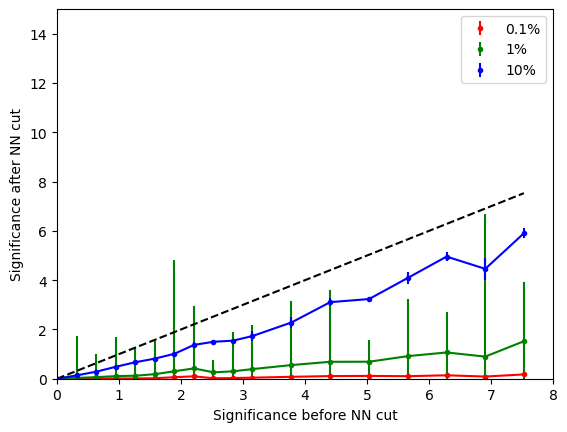

In [15]:
plt.errorbar(sig_before, sig_after_1_mean, yerr = sig_after_1_std, fmt = '.', c='r', label = '0.1%')
plt.plot(sig_before, sig_after_1_mean, c = 'r')
plt.errorbar(sig_before, sig_after_2_mean, yerr = sig_after_2_std, fmt = '.', c = 'g', label = '1%')
plt.plot(sig_before, sig_after_2_mean, c = 'g')
plt.errorbar(sig_before, sig_after_3_mean, yerr = sig_after_3_std, fmt = '.', c = 'b', label = '10%')
plt.plot(sig_before, sig_after_3_mean, c = 'b')
plt.plot(sig_before, sig_before, ls = '--', c = 'black')
plt.xlabel('Significance before NN cut')
plt.ylabel('Significance after NN cut')
plt.legend(loc = 'upper right')
plt.xlim(0, 8)
plt.ylim(0, 15)
plt.show()